In [192]:
import numpy as np
import pandas as pd

In [193]:
df = pd.read_csv('athlete_events.csv')
region_df = pd.read_csv('noc_regions.csv')

In [194]:
df.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


In [195]:
df.shape

(271116, 15)

In [196]:
df = df[df['Season'] == 'Summer']
df.shape

(222552, 15)

In [197]:
df = df.merge(region_df, on='NOC', how='left')
df.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
222547,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN
222548,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN
222549,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN
222550,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN
222551,135568,Olga Igorevna Zyuzkova,F,33.0,171.0,69.0,Belarus,BLR,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Women's Basketball,NaN,Belarus,NaN


In [198]:
df.shape

(222552, 17)

In [199]:
df['region'].unique()

array(['China', 'Denmark', 'Netherlands', 'Finland', 'Norway', 'Romania',
       'Estonia', 'France', 'Morocco', 'Spain', 'Egypt', 'Iran',
       'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan', 'Russia',
       'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon', 'Turkey',
       'Chile', 'Mexico', 'USA', 'Nicaragua', 'Hungary', 'Nigeria',
       'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'Syria',
       'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Canada', 'Ireland',
       'Australia', 'South Africa', 'Eritrea', 'Tanzania', 'Jordan',
       'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros',
       'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia', 'Maldives',
       'Ethiopia', 'United Arab Emirates', 'Yemen', 'Indonesia',
       'Philippines', nan, 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan',
       'Japan', 'Republic of Congo', 'Switzerland', 'Brazil', 'Monaco',
       'Israel', 'Uruguay', 'Sweden', 'Sri Lanka', 'Armenia',
       'Ivory Coast', 'Kenya', 'Ben

In [200]:
df.duplicated().sum()

1385

In [201]:
df.drop_duplicates(inplace=True)

In [202]:
df.duplicated().sum()

0

In [203]:
df['Medal'].value_counts()

Gold      11456
Bronze    11409
Silver    11212
Name: Medal, dtype: int64

In [204]:
df = pd.concat([df, pd.get_dummies(df['Medal'])], axis=1)
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0


In [205]:
df.drop(df[df['Year']==1906].index, inplace=True)
df.groupby('NOC').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold',ascending=False)

,Gold,Silver,Bronze
NOC,,,
USA,2460.0,1327.0,1191.0
URS,832.0,635.0,596.0
GBR,626.0,707.0,612.0
GER,578.0,528.0,643.0
ITA,497.0,466.0,427.0
...,...,...,...
LBR,0.0,0.0,0.0
LCA,0.0,0.0,0.0
LES,0.0,0.0,0.0


In [206]:
medal_tally = df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])

In [207]:
medal_tally = medal_tally.groupby('region').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold',ascending=False).reset_index()

In [208]:
medal_tally['Total'] = medal_tally['Gold'] + medal_tally['Silver'] + medal_tally['Bronze']

In [209]:
medal_tally[medal_tally['region']=='India']

,region,Gold,Silver,Bronze,Total
43,India,9.0,7.0,12.0,28.0


In [210]:
country = np.unique(df['region'].dropna().values).tolist()

In [211]:
country.sort()

In [212]:
country.insert(0, 'Overall')
country

['Overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gui

In [213]:
year = df['Year'].unique().tolist()

In [214]:
year.sort()
year.insert(0, 'Overall')
year

['Overall',
 1896,
 1900,
 1904,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [215]:
def fetch_medal_tally(df, year, country):
    medal_df = df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'])
    flag = 0
    if year == 'Overall' and country == 'Overall':
        temp_df = medal_df
    if year == 'Overall' and country != 'Overall':
        flag = 1
        temp_df = medal_df[medal_df['region'] == country]
    if year != 'Overall' and country == 'Overall':
        temp_df = medal_df[medal_df['Year'] == int(year)]
    if year != 'Overall' and country != 'Overall':
        temp_df = medal_df[(medal_df['Year'] == year) & (medal_df['region'] == country)]

    if flag == 1:
        x = temp_df.groupby('Year').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Year').reset_index()
    else:
        x = temp_df.groupby('region').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold',
                                                                                      ascending=False).reset_index()

    x['total'] = x['Gold'] + x['Silver'] + x['Bronze']

    x['Gold'] = x['Gold'].astype('int')
    x['Silver'] = x['Silver'].astype('int')
    x['Bronze'] = x['Bronze'].astype('int')
    x['total'] = x['total'].astype('int')

    print(x)

In [216]:
fetch_medal_tally(df=df, year='Overall', country='India')

    Year  Gold  Silver  Bronze  total
0   1900     0       2       0      2
1   1920     0       0       0      0
2   1924     0       0       0      0
3   1928     1       0       0      1
4   1932     1       0       0      1
5   1936     1       0       0      1
6   1948     1       0       0      1
7   1952     1       0       1      2
8   1956     1       0       0      1
9   1960     0       1       0      1
10  1964     1       0       0      1
11  1968     0       0       1      1
12  1972     0       0       1      1
13  1976     0       0       0      0
14  1980     1       0       0      1
15  1984     0       0       0      0
16  1988     0       0       0      0
17  1992     0       0       0      0
18  1996     0       0       1      1
19  2000     0       0       1      1
20  2004     0       1       0      1
21  2008     1       0       2      3
22  2012     0       2       4      6
23  2016     0       1       1      2


In [217]:
editions = df['Year'].unique().shape[0] - 1
editions

27

In [218]:
cities = df['City'].unique().shape[0]
cities

23

In [219]:
sports = df['Sport'].unique().shape[0]
sports

52

In [220]:
events = df['Event'].unique().shape[0]
events

630

In [221]:
athletes = df['Name'].unique().shape[0]
athletes

115525

In [222]:
nations = df['region'].unique().shape[0]
nations

206

In [223]:
nations_over_time = df.drop_duplicates(['Year', 'region'])['Year'].value_counts().reset_index().sort_values('index')
nations_over_time.rename(columns={'index': 'Edition', 'Year': 'No. of Countries'}, inplace=True)
nations_over_time

,Edition,No. of Countries
27,1896,12
22,1900,31
26,1904,14
25,1908,22
24,1912,29
23,1920,29
21,1924,45
20,1928,46
19,1932,47
18,1936,49


In [224]:
import plotly.express as px

In [225]:
nations_over_time = df.drop_duplicates(['Year', 'region'])['Year'].value_counts().reset_index().sort_values('index')
nations_over_time.rename(columns={'index': 'Edition', 'Year': 'Countries'}, inplace=True)
nations_over_time

,Edition,Countries
27,1896,12
22,1900,31
26,1904,14
25,1908,22
24,1912,29
23,1920,29
21,1924,45
20,1928,46
19,1932,47
18,1936,49


In [226]:
fig = px.line(nations_over_time, x="Edition", y="Countries")
fig.show()

In [227]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222547,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN,0,0,0
222548,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN,0,0,0
222549,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0
222550,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0


In [228]:
import seaborn as sns
import matplotlib.pyplot as plt

In [229]:
x=df.drop_duplicates(['Year', 'Sport', 'Event'])

<AxesSubplot:xlabel='Year', ylabel='Sport'>

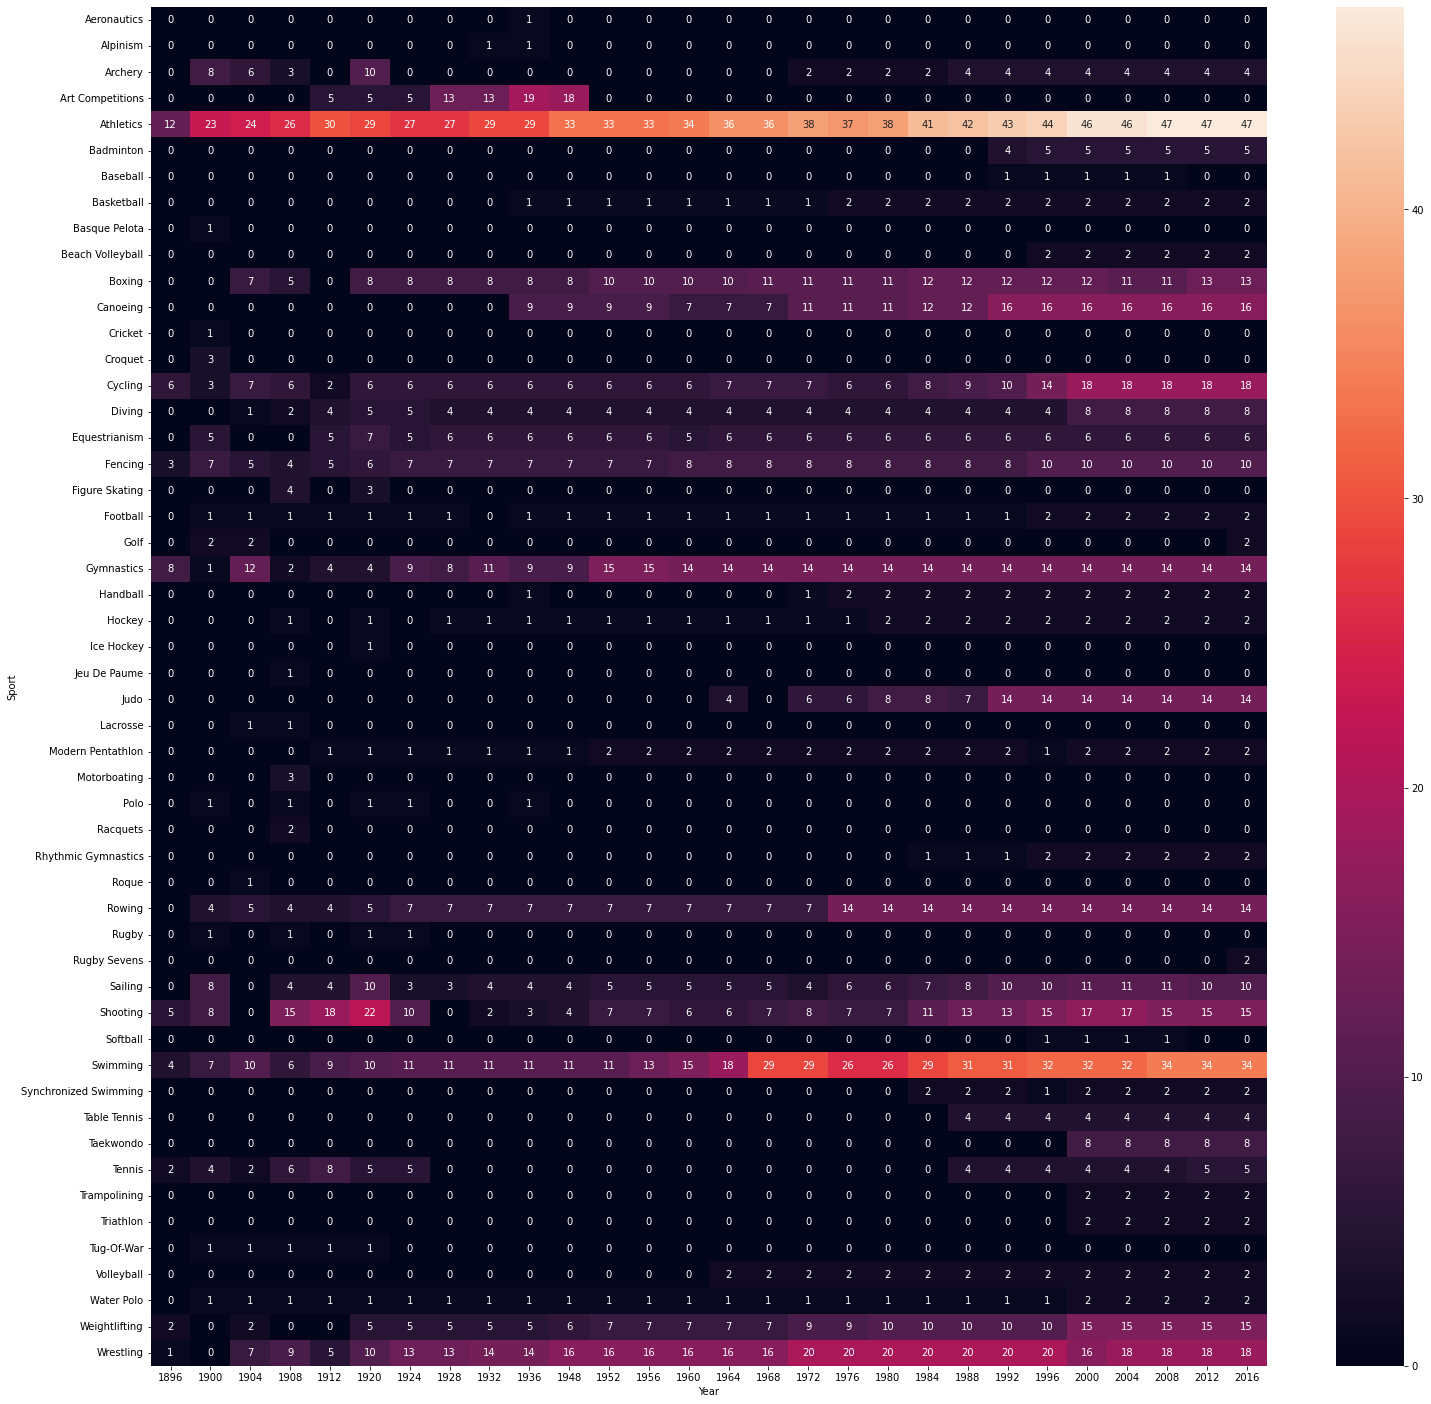

In [230]:
plt.figure(figsize=(25,25))
sns.heatmap(x.pivot_table(index='Sport', columns='Year', values='Event', aggfunc='count').fillna(0).astype('int'), annot=True)

In [231]:
temp_df = df.dropna(subset=['Medal'])
temp_df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'], inplace=True)

In [232]:
new_df = temp_df[temp_df['region']=='USA']
new_df.groupby('Year').count()['Medal'].reset_index()

,Year,Medal
0,1896,19
1,1900,54
2,1904,231
3,1908,46
4,1912,63
5,1920,95
6,1924,99
7,1928,56
8,1932,110
9,1936,57


<AxesSubplot:xlabel='Year', ylabel='Sport'>

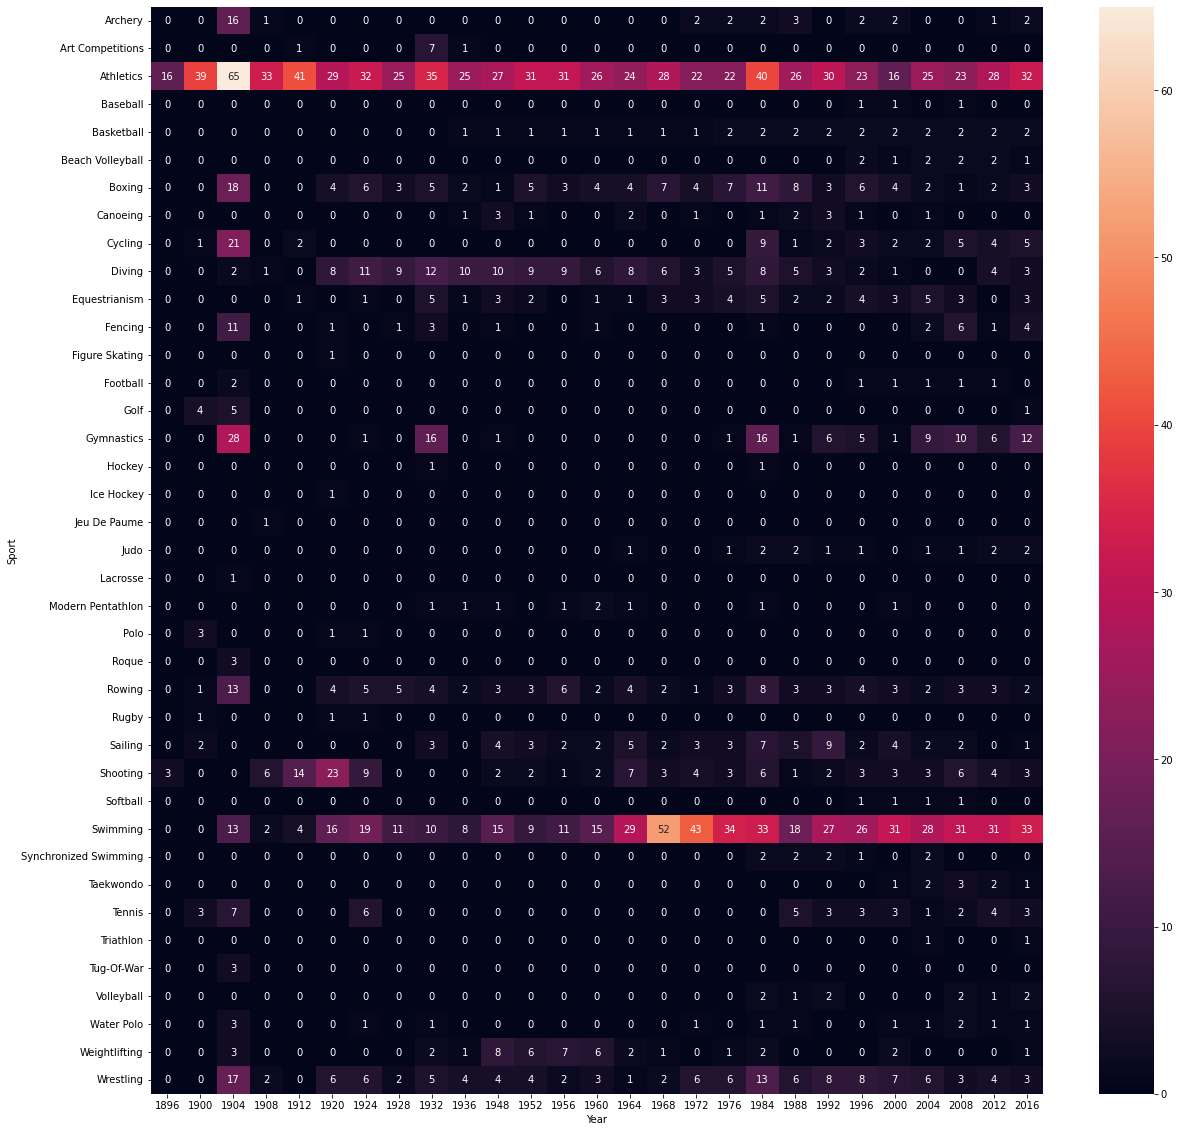

In [233]:
plt.figure(figsize=(20, 20))
sns.heatmap(new_df.pivot_table(index='Sport', columns='Year', values='Medal', aggfunc='count').fillna(0), annot=True)

In [234]:
def most_successful_countrywise(df, country):
    temp_df = df.dropna(subset=['Medal'])

    temp_df = temp_df[temp_df['region'] == country]

    x = temp_df['Name'].value_counts().reset_index().head(10).merge(df, left_on='index', right_on='Name', how='left')[
        ['index', 'Name_x', 'Sport']].drop_duplicates('index')
    x.rename(columns={'index': 'Name', 'Name_x': 'Medals'}, inplace=True)
    return x

In [235]:
most_successful_countrywise(df, 'USA')

,Name,Medals,Sport
0,"Michael Fred Phelps, II",28,Swimming
30,"Dara Grace Torres (-Hoffman, -Minas)",12,Swimming
43,Natalie Anne Coughlin (-Hall),12,Swimming
55,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",12,Swimming
72,Ryan Steven Lochte,12,Swimming
86,Mark Andrew Spitz,11,Swimming
98,"Matthew Nicholas ""Matt"" Biondi",11,Swimming
110,Carl Townsend Osburn,11,Shooting
126,"Frederick Carlton ""Carl"" Lewis",10,Athletics
136,"Gary Wayne Hall, Jr.",10,Swimming


In [236]:
import plotly.figure_factory as ff

In [237]:
athlete_df = df.drop_duplicates(subset=['Name', 'region'])

x1 = athlete_df['Age'].dropna()
x2 = athlete_df[athlete_df['Medal'] == 'Gold']['Age'].dropna()
x3 = athlete_df[athlete_df['Medal'] == 'Silver']['Age'].dropna()
x4 = athlete_df[athlete_df['Medal'] == 'Bronze']['Age'].dropna()

In [238]:
fig = ff.create_distplot([x1, x2, x3, x4], ['Overall Age', 'Gold Medalist', 'Silver Medalist', 'Bronze Medalist'],show_hist=False, show_rug=False)
fig.show()

In [240]:
x = []
name = []
famous_sports = ['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
                'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
                'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
                'Water Polo', 'Hockey', 'Rowing', 'Fencing',
                'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
                'Tennis', 'Golf', 'Softball', 'Archery',
                'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
                'Rhythmic Gymnastics', 'Rugby Sevens',
                'Beach Volleyball', 'Triathlon', 'Rugby', 'Polo', 'Ice Hockey']
for sport in famous_sports:
    temp_df = athlete_df[athlete_df['Sport'] == sport]
    x.append(temp_df[temp_df['Medal'] == 'Gold']['Age'].dropna())
    name.append(sport)

In [241]:
athlete_df = df.drop_duplicates(subset=['Name', 'region'])
athlete_df['Medal'].fillna('No Medal', inplace=True)

c:\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

c:\python\python37\lib\site-packages\ipykernel_launcher.py:3: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



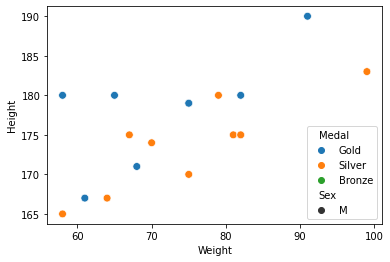

In [242]:
fig,ax = plt.subplots()
ax = sns.scatterplot(temp_df['Weight'],temp_df['Height'],hue=temp_df['Medal'],style=temp_df['Sex'],s=60)
fig.show()

In [243]:
athlete_df = df.drop_duplicates(subset=['Name', 'region'])

men = athlete_df[athlete_df['Sex'] == 'M'].groupby('Year').count()['Name'].reset_index()
women = athlete_df[athlete_df['Sex'] == 'F'].groupby('Year').count()['Name'].reset_index()

final = men.merge(women, on='Year', how='left')
final.rename(columns={'Name_x': 'Male', 'Name_y': 'Female'}, inplace=True)

final.fillna(0, inplace=True)

In [246]:
fig = px.line(final, x="Year", y=["Male", "Female"])

In [247]:
fig.show()